## Question: Is there a correlation between the percentage of housing built before the 1950s and lead exposure? 

In [0]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

###The datasets used to answer this are:
+ Lead levels among the demographics of the New York State
+ Percentages of housing units built over the years (we focused on the percentages before the 1950s)

In [0]:
lead = 'https://raw.githubusercontent.com/ahalyasanjiv/ChildhoodLeadExposure/master/data/NYS_Lead_Levels_and_Demographics.csv'
df = pd.read_csv(lead)
housing = 'https://raw.githubusercontent.com/ahalyasanjiv/ChildhoodLeadExposure/master/data/Housing_Units_Built_Pecentage_by_Year.csv'
df2 = pd.read_csv(housing)

After loading in that data, we did a JOIN on the two datasets using the common column, '***Zip Code***', calling our new dataframe, intersected_df. 

In [0]:
intersected_df = df.set_index('Zip Code').join(df2.set_index('Zip'), how='inner')
intersected_df.columns

Index(['Percent Elevated Lead Cases', 'One race - White',
       'One race - Black or African American',
       'One race - American Indian and Alaska Native', 'One race - Asian',
       'One race - Native Hawaiian and Other Pacific Islander',
       'One race - Some other race', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino', 'Median Income',
       'Population for whom poverty status is determined - Below 100 percent of the poverty level',
       'Total Housing Units', '% of housing units built 1950 - 1959',
       '% built 1940 - 1949', '% built 1939 or earlier',
       '% of housing units built before 1950'],
      dtype='object')

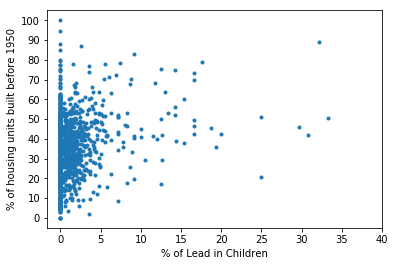

In [0]:
# Make a scatter plot
_= plt.plot(intersected_df['Percent Elevated Lead Cases'], intersected_df['% of housing units built before 1950'], marker='.', linestyle='none')

# Label the axes
_ = plt.ylabel('% of housing units built before 1950')
_ = plt.xlabel('% of Lead in Children')
_ = plt.yticks(np.arange(0,105, step=10))
_ = plt.xticks(np.arange(0,41, step=5))

# Show the result
plt.show()

As shown above, we created a scatter plot of the data to find a story behind the data. We discovered somewhat of a correlation and decided to calculate the actual value:

In [0]:
intersected_df['% of housing units built before 1950'].corr(intersected_df['Percent Elevated Lead Cases'])

0.2471856834860288

## Answer:  Yes, there is a weak, but positive correlation. 